# Линейная алгебра. Лабораторная работа 1, осень 2019

# Никитин Богдан БПМИ199  ИБ

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас я создам нулевую матрицу

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
#1 создайте нулевую матрицу  𝑍  размера  3×4
Z = np.zeros((3,4), dtype = int)
Z

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [5]:
#2 создайте диагональную матрицу  5×5  с диагональными элементами 1, 2, 3, 4 и 5
D = np.diagflat([np.arange(1,6)])
D

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [6]:
#3 найдите её след
D.trace()

15

In [7]:
#4 найдите обратную к ней матрицу
sla.inv(D)

array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [8]:
#5 сгенерируйте случайную матрицу 𝑋  размера  4×5
X = np.random.random((4,5))
X

array([[0.15555214, 0.22431289, 0.85472517, 0.17177468, 0.05778495],
       [0.77278573, 0.91546709, 0.85698451, 0.06441994, 0.35180401],
       [0.34092901, 0.81163738, 0.19172412, 0.41479884, 0.3911452 ],
       [0.28131488, 0.10886921, 0.97584649, 0.85246685, 0.55642699]])

In [9]:
#6 найдите определитель подматрицы матрицы  𝑋 , расположенной на пересечении 2 и 3 строки и 1 и 2 столбца
np.linalg.det(X[np.ix_((1, 2), (0, 1))])

0.31511249535355823

In [10]:
#7 найдите произведение  𝑋𝑇𝑋
np.dot(X.T, X)

array([[0.81676491, 1.04968952, 1.13510418, 0.4577313 , 0.57074163],
       [1.04968952, 1.55900401, 1.23811709, 0.52697924, 0.71307274],
       [1.13510418, 1.23811709, 2.45401206, 1.11343075, 0.96886013],
       [0.4577313 , 0.52697924, 1.11343075, 0.93241427, 0.66917132],
       [0.57074163, 0.71307274, 0.96886013, 0.66917132, 0.58971073]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а, кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [11]:
def my_det(X):
    
    if X.shape[0] != X.shape[1]:
        return ValueError
    else:
        wrong = 0
        sign = 1
        A = X.copy() 
        n = A.shape[0]
        
        for i in range(n):
            diag_elem = A[i, i]
            
            if diag_elem == 0:
                e = i + 1
                while (e < n-1) and (A[e, i] == 0):
                    e += 1
                if A[e, i] == 0:
                    wrong = 1
                else:
                    sign = (-1)*sign
                    A[i], A[e] = A[e].copy(), A[i].copy()
  
            if wrong == 1:
                break

            diag_elem = A[i, i]

            for j in range(i + 1, n):
                elem = A[j, i]
                A[j] = A[j] + (-elem / diag_elem) * A[i] 
    
    det = 1
    for i in range(n):
        det *= A[i, i]
    det = sign * det
            
    return det


Простая проверка:

In [12]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [13]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

33.5 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
457 µs ± 74.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
342 µs ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
50.1 ms ± 9.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 4.66 times longer than the fastest. This could mean that an intermediate result is being cached.
4.21 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
450 ms ± 38.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


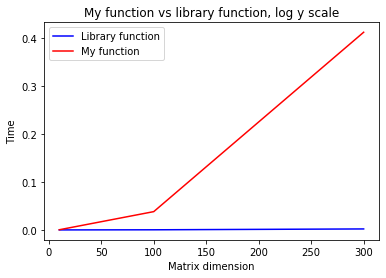

In [14]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 300]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

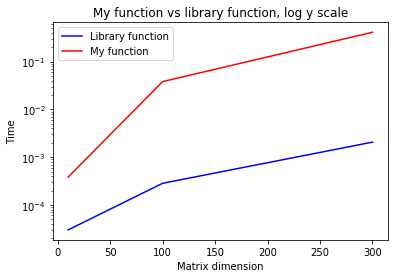

In [16]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [17]:
A1= np.array([[1, 0],[10**20, 1]])
B1 = np.array([[10**(-20), 1],[0, 1-10**20]])
A2 = np.array([[1., 0.],[10.**20, 1.]])
B2 = np.array([[10.**(-20), 1.],[0., 1.-(10.)**20]])
print(np.dot(A1, B1))
print(np.dot(A2, B2))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Способ представления в целых числах - правильный**

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [18]:

def my_pascal(dim):
      
    P = np.zeros((dim, dim), dtype=int)
    
    for i in range (dim):
        P[i, 0] = 1
        P[0, i] = 1
    
    for i in range (1, dim):
        for j in range(i, dim):
            P[i, j] = P[i-1, j] + P[i, j-1]
            P[j, i] = P[i, j]
    
    return P


Чему равен её определитель? Обязательно объясните свой ответ.

----
*Матрица Паскаля равна произведению нижнетреугольной и верхнетреугольной матриц те Sn = Ln * Un. Определитель треугольных матриц равен произведению их диагональных элементов. Значит определители Un Ln равны 1. Отсюда получим, что определитель Sn= 1 * 1 = 1*
**Ответ: определитель матрицы Паскаля равен единице**


А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [19]:
P = my_pascal(30)
np.linalg.det(P)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


-6.844163049416415e+185

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [20]:
def prod_and_sq_sum(A):
    D = np.diag(A)
    D = D**2
    Com = np.linalg.det(np.diagflat(D))
    return Com, D.sum(axis = 0)


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [21]:
def f(A, B, k):
    A = A[:, :min(A.shape[1],k)]
    B = B[:, :min(B.shape[1],k)]
    return np.dot(A, B.T)


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [22]:
def get_diag(A, B):
    c = A * (B.T)
    return c.sum(axis = 1)


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [23]:
import math
import cmath

def shrink_rotate(x, a, coef=1., angle=0.):

    ax = x - a
    ax *= coef
    
    return a + ax * (math.cos(angle) + 1j * math.sin(angle))
    raise NotImplementedError()


def shrink_rotate_conj(x, a, coef=1., angle=0.):
    
    ay = shrink_rotate(x, a, coef, angle) - a
    ay_new = ay.real - ay.imag * 1j
    
    return a + ay_new
    raise NotImplementedError()
    

def geometric_inverse(x, a, r):

    ax = x - a
    rx, phi = cmath.polar(ax)
    rx1 = r/rx
    x1 = cmath.rect(rx1, phi)
    
    return x1 + a
    raise NotImplementedError()
    


**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

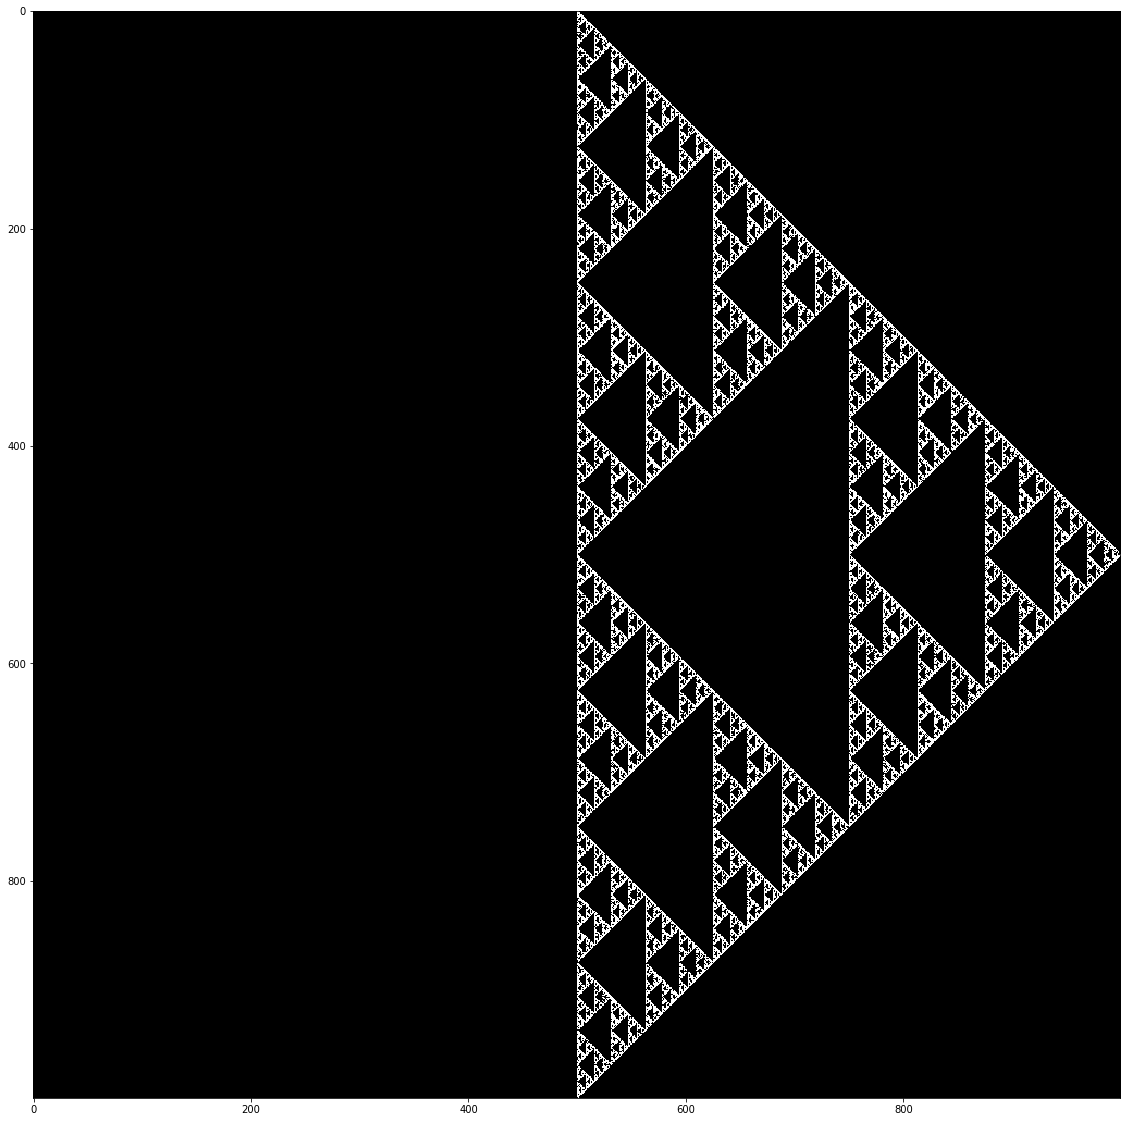

In [24]:
z = 0.5 + 0.*1j
max_iter = 100000

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

rez = np.zeros((1000,1000))
z = 0.5 + 0.*1j
size = 500

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    coord_r = round((z.real+1)*size)
    coord_i = round((z.imag+1)*size)
    if coord_r < 1000 and coord_i < 1000:
        if coord_r > 0 and coord_i > 0:
            rez[coord_r, coord_i] = 1
    
plt.figure(figsize=(20, 20))
plt.imshow(rez, cmap='gray')

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

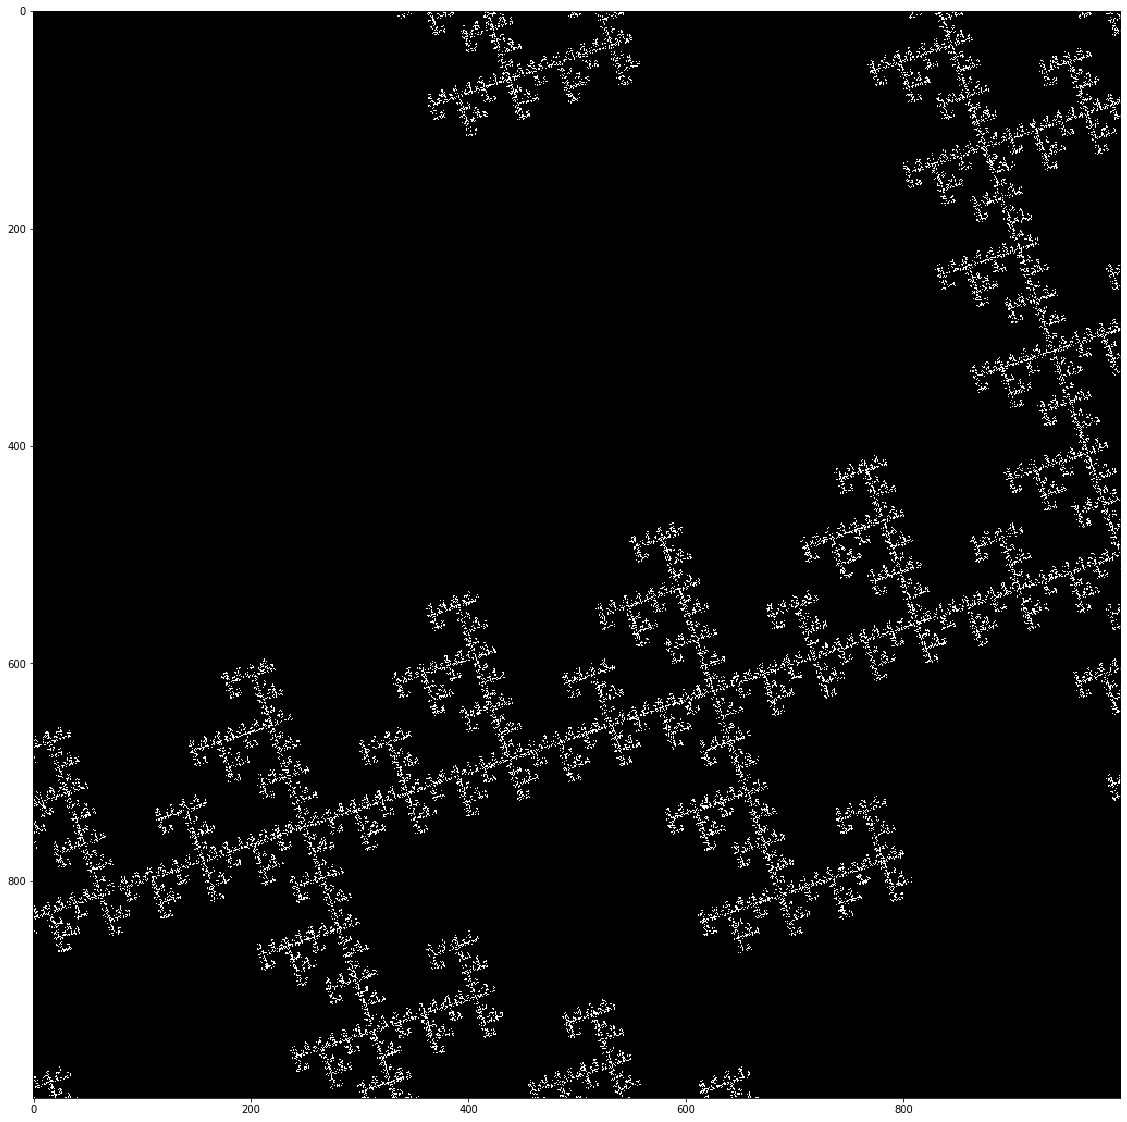

In [25]:
import math
z = 0.5 + 0.*1j
max_iter = 100000

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=math.pi/2)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=math.pi/2)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=math.pi/2))
]

rez = np.zeros((1000,1000))
z = 0.5 + 0.*1j
size = 500

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    coord_r = round((z.real+1)*size)
    coord_i = round((z.imag+1)*size)
    if coord_r < 1000 and coord_i < 1000:
        if coord_r > 0 and coord_i > 0:
            rez[coord_r, coord_i] = 1
    
plt.figure(figsize=(20, 20))
plt.imshow(rez, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

40.7 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
151 µs ± 40 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
263 µs ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
444 µs ± 105 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
484 µs ± 202 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
860 µs ± 248 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.36 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.62 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
42.2 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
84 ms ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
225 ms ± 45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


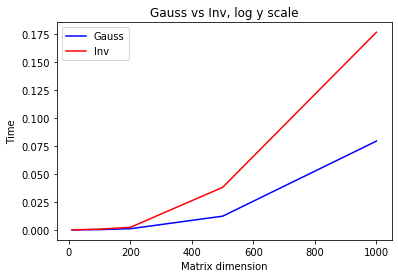

In [26]:
# m = 10
from time import time

Gauss_times = []
Inv_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
for n in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, 10)
    res_Gauss = %timeit -o np.linalg.solve(A, B)
    res_Inv = %timeit -o np.dot(sla.inv(A), B)
    Gauss_times.append(res_Gauss.best)
    Inv_times.append(res_Inv.best)
    
plt.plot(dimensions, Gauss_times, color='blue', label='Gauss')
plt.plot(dimensions,Inv_times, color='red', label='Inv')
plt.title('Gauss vs Inv, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

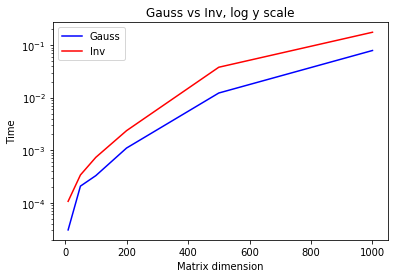

In [27]:
plt.semilogy(dimensions, Gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, Inv_times, color='red', label='Inv')
plt.title('Gauss vs Inv, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

503 µs ± 123 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 5.23 times longer than the fastest. This could mean that an intermediate result is being cached.
2.02 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
522 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.33 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.66 ms ± 309 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.89 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.92 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.47 ms ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.84 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.7 ms ± 3.33 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.7 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
16.9 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
44.1 ms ± 430 µs per

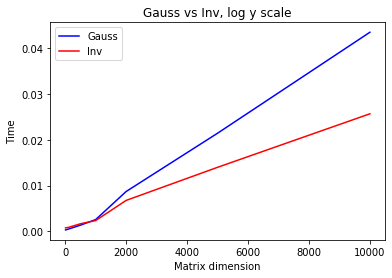

In [28]:
# n = 100
from time import time

Gauss_times = []
Inv_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
for m in dimensions:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, m)
    res_Gauss = %timeit -o np.linalg.solve(A, B)
    res_Inv = %timeit -o np.dot(sla.inv(A), B)
    Gauss_times.append(res_Gauss.best)
    Inv_times.append(res_Inv.best)
    
plt.plot(dimensions, Gauss_times, color='blue', label='Gauss')
plt.plot(dimensions,Inv_times, color='red', label='Inv')
plt.title('Gauss vs Inv, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

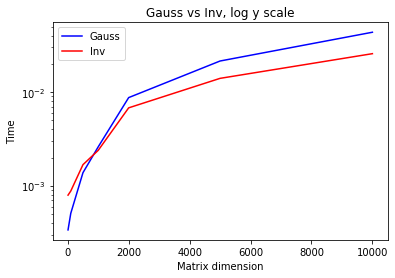

In [29]:
plt.semilogy(dimensions, Gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, Inv_times, color='red', label='Inv')
plt.title('Gauss vs Inv, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()